In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import random

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

from stardist import fill_label_holes, relabel_image_stardist, random_label_cmap
from stardist.matching import matching_dataset

np.random.seed(42)
lbl_cmap = random_label_cmap()

## create subsample filefolder and move files

In [2]:
%cd /home/qzt

/home/qzt


In [3]:
%pwd

'/home/qzt'

In [36]:
X = sorted(glob('data/dsb2018/train/images/*.tif'))
Y = sorted(glob('data/dsb2018/train/masks/*.tif'))
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

In [37]:
ind = np.arange(len(X))
random.seed(4)
random.shuffle(ind)
ind_sub = ind[:5]
ind_sub


array([173, 214, 154, 341, 363])

In [46]:
X_sub = [X[i] for i in ind_sub]
X_sub

['data/dsb2018/train/images/61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510.tif',
 'data/dsb2018/train/images/7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4.tif',
 'data/dsb2018/train/images/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd.tif',
 'data/dsb2018/train/images/c75139ef0546d2240b37afb3219eb74a06b7977818697d5c3138796472483af3.tif',
 'data/dsb2018/train/images/d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7.tif']

In [47]:
name = [Path(x).name for x in X_sub]
name

['61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510.tif',
 '7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4.tif',
 '58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd.tif',
 'c75139ef0546d2240b37afb3219eb74a06b7977818697d5c3138796472483af3.tif',
 'd3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7.tif']

In [49]:
Y_sub = ['data/dsb2018/train/masks/' + n for n in name]
Y_sub

['data/dsb2018/train/masks/61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510.tif',
 'data/dsb2018/train/masks/7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4.tif',
 'data/dsb2018/train/masks/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd.tif',
 'data/dsb2018/train/masks/c75139ef0546d2240b37afb3219eb74a06b7977818697d5c3138796472483af3.tif',
 'data/dsb2018/train/masks/d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7.tif']

In [51]:
import os 
import shutil

In [53]:
m_path = 'data/dsb2018/train_sub/masks/'
i_path = 'data/dsb2018/train_sub/images/'

os.makedirs(os.path.dirname(i_path), exist_ok=True)
for f in X_sub:
    shutil.copy(f, i_path)

In [54]:
os.makedirs(os.path.dirname(m_path), exist_ok=True)
for f in Y_sub:
    shutil.copy(f, m_path)

## read image file from subsampled folder

In [7]:
X = sorted(glob('data/dsb2018/train_sub/images/*.tif'))
Y = sorted(glob('data/dsb2018/train_sub/masks/*.tif'))
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

In [14]:
X

['data/dsb2018/train_sub/images/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd.tif',
 'data/dsb2018/train_sub/images/61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510.tif',
 'data/dsb2018/train_sub/images/7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4.tif',
 'data/dsb2018/train_sub/images/c75139ef0546d2240b37afb3219eb74a06b7977818697d5c3138796472483af3.tif',
 'data/dsb2018/train_sub/images/d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7.tif']

In [8]:
im_X = list(map(imread,X))
im_Y = list(map(imread,Y))

In [22]:
i=0
img, lbl = im_X[i], fill_label_holes(im_Y[i])
assert img.ndim in (2,3)
name = Path(X[i]).name
print(img.shape)

(360, 360)


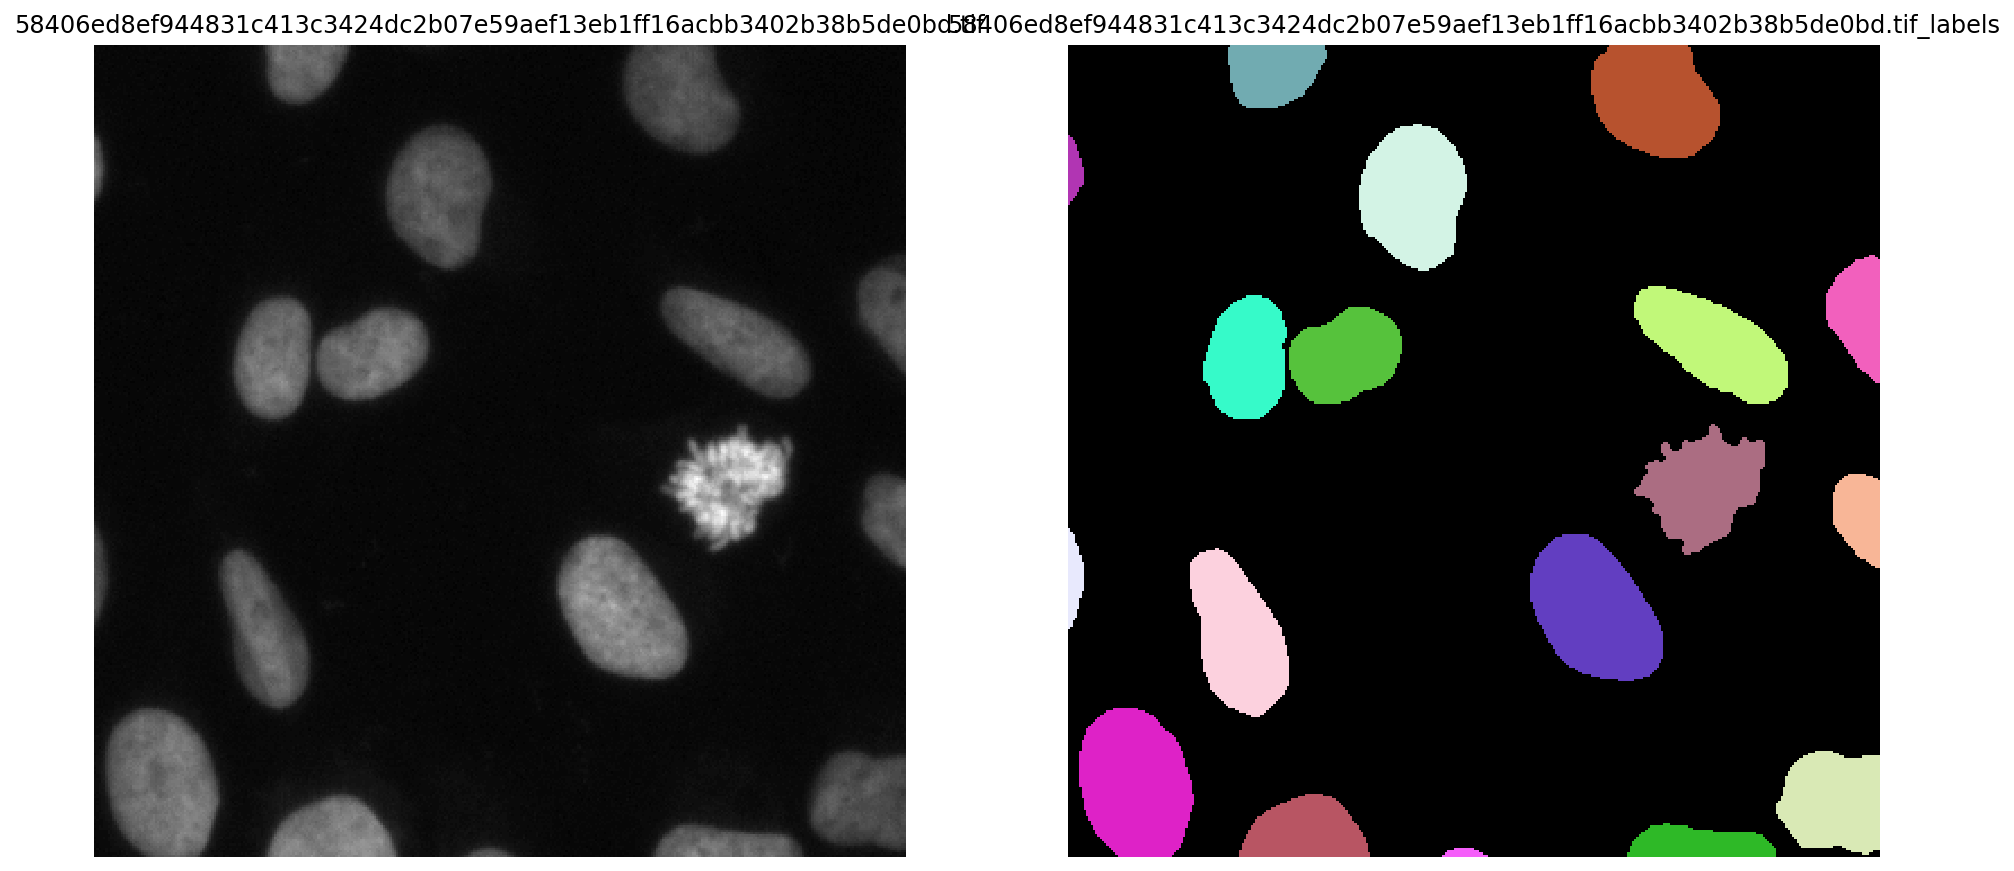

In [23]:
# img = img if img.ndim==2 else img[...,:3]
# assumed axes ordering of img and lbl is: YX(C)
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title(name)
plt.subplot(122); plt.imshow(lbl,cmap=lbl_cmap); plt.axis('off'); plt.title(name+'_labels')
None;